In [1]:
%pip install seaborn
%pip install statsmodels


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Same code as in the first module. You can skip this- we are just applying the same cleaning and preprocessing we did before in this notebook

In [2]:

# Load a dataset from a csv file, and store it as a DataFrame in the variable df.
# A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types.
df = pd.read_csv('heart_disease.csv')

# Remove any rows from the DataFrame which contain missing values.
df.dropna(inplace=True)

# Define a list of column names in the DataFrame that we know to contain categorical variables.
# Categorical variables represent types of data which may be divided into groups.
categorical_columns = ['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Heart_stroke']

# Loop through each column name in our list of categorical columns.
for column in categorical_columns:
    # Convert the data type of each column to 'category'.
    # This tells pandas that this column should be treated as categorical data.
    df[column] = df[column].astype('category')
    
# Define a list of column names in the DataFrame that we know to contain text data.
text_columns = ['Gender', 'education', 'prevalentStroke', 'Heart_stroke']

# Loop through each column name in our list of text columns.
for column in text_columns:
    # Convert all characters in the text to lower case.
    # This can help with consistency when analyzing or comparing text.
    df[column] = df[column].str.lower()
    
# Replace the string values 'yes' and 'no' in the 'prevalentStroke' column with 1 and 0 respectively.
# This process is known as encoding, and it allows us to represent categorical data numerically.
df['prevalentStroke'] = df['prevalentStroke'].map({'yes': 1, 'no': 0})

# Replace the string values 'yes' and 'no' in the 'Heart_stroke' column with 1 and 0 respectively.
# This is another example of encoding categorical data.
df['Heart_stroke'] = df['Heart_stroke'].map({'yes': 1, 'no': 0})


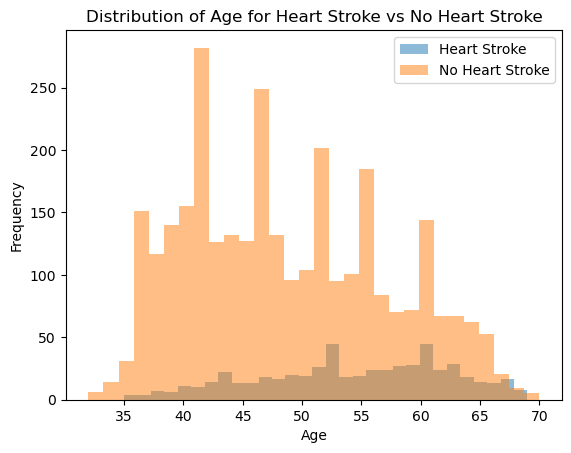

T-statistic: 14.536366222925679
p-value: 1.3893803444427658e-46


In [3]:
# The t-test is a statistical hypothesis test where the test statistic follows a Student's t-distribution if the null hypothesis is supported. 
# It is most commonly applied when the test statistic follows a normal distribution and the value of a scaling term in the test statistic is known.

# We're going to divide the dataframe into two separate groups based on whether or not they had a heart stroke.
group1 = df[df['Heart_stroke'] == 1]['age']  # Individuals who had a heart stroke
group2 = df[df['Heart_stroke'] == 0]['age']  # Individuals who didn't have a heart stroke

# Plot histograms of both groups' ages. The alpha parameter is used to set the transparency level of the plot.
plt.hist(group1, bins=30, alpha=0.5, label='Heart Stroke')
plt.hist(group2, bins=30, alpha=0.5, label='No Heart Stroke')

plt.legend(loc='upper right')  # Add a legend to the plot
plt.xlabel('Age')  # Add a label to the x-axis
plt.ylabel('Frequency')  # Add a label to the y-axis
plt.title('Distribution of Age for Heart Stroke vs No Heart Stroke')  # Add a title to the plot
plt.show()  # Display the plot

# Perform a t-test to compare the means of both groups. ttest_ind returns two values: 
# t-statistic (a measure of the difference between the two means relative to the variability in the data) and 
# p-value (probability of observing a t-statistic as extreme as the one calculated if the null hypothesis was true).
t_stat, p_val = ttest_ind(group1, group2)


# The t-statistic is like the score in a game - a big number (positive or negative) shows a clear winner, or in our case, a clear difference.
# The p-value is a bit like the odds of getting a score that extreme if there was no real difference.
# A small p-value (usually less than 0.05) suggests that the difference we see isn't just due to random chance
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_val}')


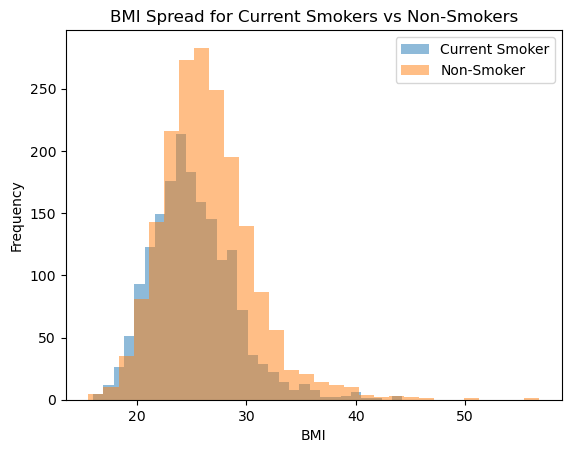

T-statistic: -9.771162803727364
p-value: 2.799586252534595e-22


In [4]:
# We're looking to compare the Body Mass Index (BMI) between current smokers and non-smokers. We're curious if there's a noticeable difference in BMI between these two groups.

# We'll split our data into two groups: 'Current Smoker' and 'Non-Smoker'
group1 = df[df['currentSmoker'] == 1]['BMI']  # This holds the BMI data of current smokers
group2 = df[df['currentSmoker'] == 0]['BMI']  # This holds the BMI data of non-smokers

# We're making a histogram, which is kind of like a bar chart that helps us see how data is spread out.
plt.hist(group1, bins=30, alpha=0.5, label='Current Smoker')
plt.hist(group2, bins=30, alpha=0.5, label='Non-Smoker')

# Add a legend to help us understand which color represents which group
plt.legend(loc='upper right')

# The x-axis shows BMI, and the y-axis shows the number of people with that BMI.
plt.xlabel('BMI')
plt.ylabel('Frequency')

# A title for our chart so that we know what it's about
plt.title('BMI Spread for Current Smokers vs Non-Smokers')

# This line of code makes the chart pop up so we can see it
plt.show()

# Here's where we run a t-test to see if there's a real difference between the two groups or if it's just random chance.
# It returns two things: the t-statistic and the p-value.
t_stat, p_val = ttest_ind(group1, group2)

# Print the t-statistic and p-value. The p-value is commonly used in hypothesis testing to help you support or reject the null hypothesis. 
# It represents the probability that the results of your test occurred at random. If p-value is low (commonly below 0.05), it suggests 
# that the null hypothesis is unlikely to be true, and that the difference in the group means is statistically significant..
print(f'T-statistic: {t_stat}')
print(f'p-value: {p_val}')


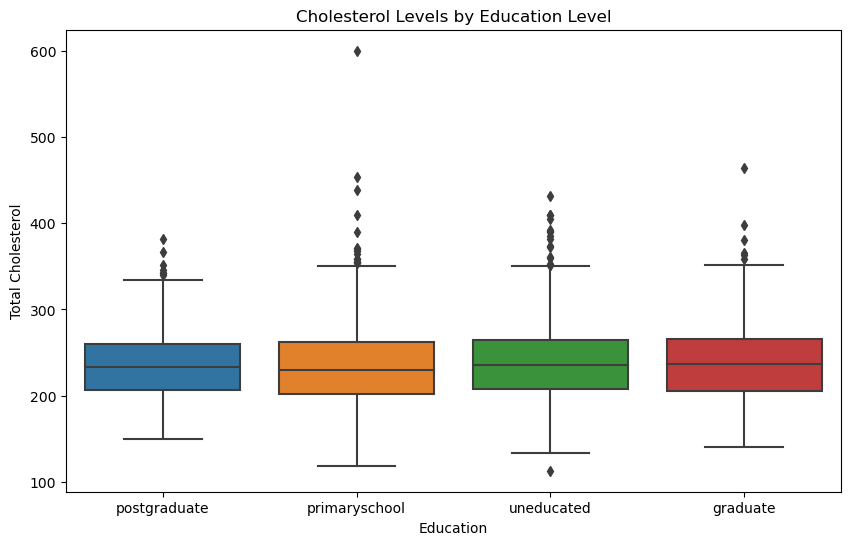

F-value: 1.2474439970966675
p-value: 0.290832384956388


In [5]:
# First, we're creating a box plot which is a type of graph that gives us a good summary of the data. We're looking at cholesterol levels grouped by education levels.
plt.figure(figsize=(10,6)) # Making the plot a good size so it's easier to read
sns.boxplot(x='education', y='totChol', data=df) # We're using the seaborn library (sns) to create our box plot

# Let's label our axes and give our chart a title
plt.xlabel('Education') # The x-axis is our education categories
plt.ylabel('Total Cholesterol') # The y-axis is the cholesterol levels
plt.title('Cholesterol Levels by Education Level') # And our title

plt.show() # Show the plot!

# Next, we're grouping our cholesterol data by the education categories
group1 = df[df['education'] == 'uneducated']['totChol'] #  uneducated individuals
group2 = df[df['education'] == 'primaryschool']['totChol'] # individuals that only went to primary school
group3 = df[df['education'] == 'graduate']['totChol'] # individuals that graduated
group4 = df[df['education'] == 'postgraduate']['totChol'] # individuals that went beyond graduation

# Now we're going to use a one way ANOVA test. This is a way to see if there's a significant difference between the average cholesterol levels in these groups.
# If the p-value is small (usually less than 0.05), then we can say the difference is not just by chance.
f_val, p_val = f_oneway(group1, group2, group3, group4)

# Print the results! The F-value is like the score of the game - a big number (positive or negative) shows a clear winner or difference
print(f'F-value: {f_val}')
print(f'p-value: {p_val}') # The p-value is like the odds of getting this score if there's no real difference. A small p-value means the difference is likely not due to chance


   sysBP    BMI BP_category
0  106.0  26.97      90-119
1  121.0  28.73     120-129
2  127.5  25.34     120-129
3  150.0  28.58     130-159
4  130.0  23.10     120-129
BP_category
130-159    1261
90-119     1185
120-129     818
>160        386
<90           6
Name: count, dtype: int64


/var/folders/cy/r57v8qdj4f5_mg9q7pmcfbjr0000gn/T/ipykernel_87926/641872077.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['BP_category'] = pd.cut(df_new['sysBP'], bins=bins, labels=labels)


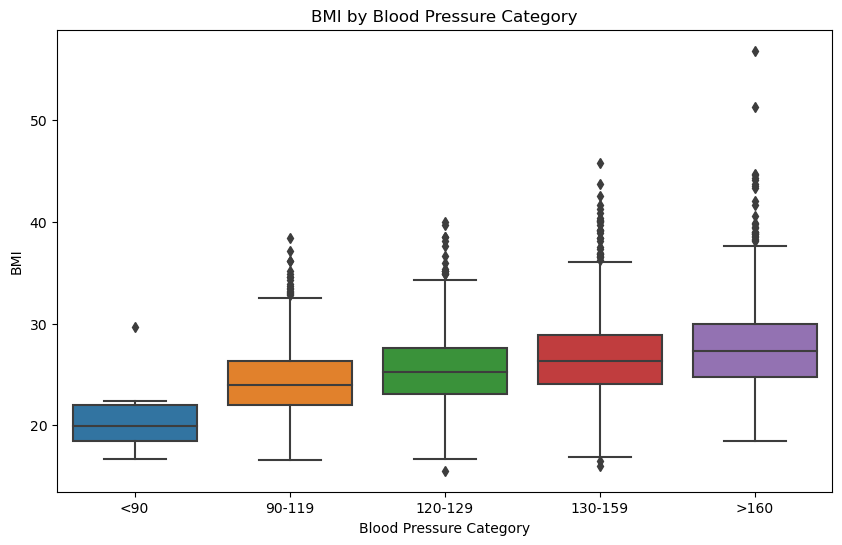

F-value: 99.01319841795558
p-value: 4.02916027996435e-80


In [6]:
# First, we're focusing on only two variables from our dataset: systolic blood pressure (sysBP) and BMI.
df_new = df[['sysBP', 'BMI']] #create a new df containing only a subset of the original (systolic BP and BMI)

# We are creating bins or groups for different ranges of systolic blood pressure.
bins = [0, 90, 120, 130, 160, np.inf]
labels = ['<90', '90-119', '120-129', '130-159', '>160']

# Now, we're adding a new column to our data that tells us which blood pressure group each person falls into. 
# You can take a look at some of the pandas documentation to see how this works under the hood
df_new['BP_category'] = pd.cut(df_new['sysBP'], bins=bins, labels=labels)

# Let's see how it looks
print(df_new.head())

# Also, let's check how many people fall into each blood pressure group.
print(df_new['BP_category'].value_counts())

# Now, we're going to create a box plot of BMI across the different blood pressure categories. 
plt.figure(figsize=(10,6))
sns.boxplot(x='BP_category', y='BMI', data=df_new, order=labels)

# Let's add some labels to make it easy to understand what we're looking at.
plt.xlabel('Blood Pressure Category')
plt.ylabel('BMI')
plt.title('BMI by Blood Pressure Category')

# Show me the plot!
plt.show()

# Now, we want to see if there's a significant difference in the average BMI across our blood pressure groups. 
# To do this, we're using an ANOVA test. This test gives us a p-value, which is a number that helps us figure out if the differences we see in the averages are significant or not.
fvalue, pvalue = f_oneway(df_new[df_new['BP_category'] == '<90']['BMI'],
                                 df_new[df_new['BP_category'] == '90-119']['BMI'],
                                 df_new[df_new['BP_category'] == '120-129']['BMI'],
                                 df_new[df_new['BP_category'] == '130-159']['BMI'],
                                 df_new[df_new['BP_category'] == '>160']['BMI'])

# Let's print the results!
print('F-value:', fvalue) # F-value is just a measure that ANOVA test gives us. 
print('p-value:', pvalue) # The smaller the p-value, the more confident we can be that the differences we see are significant and not just due to random chance.


Tukey's Honestly Significant Difference (HSD) test and Bonferroni correction are both post-hoc tests used after an ANOVA to control for multiple comparisons, but they are typically used in slightly different scenarios:

Tukey's HSD Test is used when you are comparing all possible pairs of means. It is a single-step multiple comparison procedure and statistical test. It can be used to find means that are significantly different from each other, and maintains the family-wise error rate at a desired level (usually 0.05). It is also particularly useful when the sample sizes are equal for each group.

Bonferroni Correction, on the other hand, is used when you are doing multiple pairwise comparisons, but not necessarily all possible comparisons. It adjusts the p-value threshold downwards by the number of tests to maintain the overall error rate. It's a very conservative test, and as such, it reduces the chance of obtaining significant results by chance (false positives), but at the same time it may increase the likelihood of missing a true effect (false negatives).

In [7]:
# Perform the Tukey's HSD test
# 'df_new['BMI']' refers to the measurement we're interested in (BMI)
# 'df_new['BP_category']' represents the different groups we're comparing (BP categories)
# 'alpha=0.05' sets the statistical significance level for the test
posthoc = pairwise_tukeyhsd(df_new['BMI'], df_new['BP_category'], alpha=0.05)

# Print out the results of the test
# This will give us a detailed table showing whether there's a significant difference
# between the mean BMI of each pair of BP categories
print(posthoc)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
120-129 130-159   1.2526    0.0  0.7792   1.726   True
120-129  90-119  -1.1108    0.0 -1.5902 -0.6314   True
120-129     <90  -4.2777 0.0539 -8.5985  0.0432  False
120-129    >160   2.6982    0.0   2.047  3.3494   True
130-159  90-119  -2.3634    0.0   -2.79 -1.9367   True
130-159     <90  -5.5303 0.0043 -9.8456 -1.2149   True
130-159    >160   1.4456    0.0  0.8322   2.059   True
 90-119     <90  -3.1669 0.2649 -7.4828  1.1491  False
 90-119    >160    3.809    0.0   3.191   4.427   True
    <90    >160   6.9759 0.0001  2.6375 11.3143   True
------------------------------------------------------


In [8]:
# Create a contingency table
# A contingency table is a type of table that shows the frequency distribution of the variables.
# In this case, we're looking at the frequencies of gender (male or female) and heart stroke status (yes or no).
contingency_table = pd.crosstab(df['Gender'], df['Heart_stroke'])


print(contingency_table) # Print the contingency table


# Perform the Chi-Squared test
# The Chi-Squared test is a statistical test that can tell us if there is a significant association between two categorical variables.
# chi2: The test statistic that follows a Chi-square distribution
# p: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies, based on the marginal sums of the table
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the expected frequency distribution.
print(expected) # Print the expected frequency distribution.


# Print the results
# The p-value tells us the probability of observing a test statistic as extreme as chi2, assuming the null hypothesis is true.
# If the p-value is small (typically ≤ 0.05), it indicates strong evidence to reject the null hypothesis.
# Here, the null hypothesis is that 'Gender' and 'Heart_stroke' are independent.
# The degrees of freedom is the number of values in the final calculation that are free to vary.
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")


Heart_stroke     0    1
Gender                 
female        1784  250
male          1315  307
[[1724.1154267  309.8845733]
 [1374.8845733  247.1154267]]
Chi-square statistic: 30.261278459701792
P-value: 3.7758919146380037e-08
Degrees of freedom: 1


In [9]:
# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

print('Odds Ratio:', odds_ratio)
print('p-value:', p_value)

Odds Ratio: 1.6659711026615969
p-value: 3.306137201484809e-08


Chi-square test of independence: This test is used to determine if there is a significant association between two categorical variables in a sample. It compares the observed frequencies of categories to the frequencies that we would expect to get by chance alone if there were no association between the variables. The Chi-square test works best when the sample size is large and the expected frequency for each cell in the contingency table is 5 or more.

Fisher's exact test: This test is also used to examine the relationship between two categorical variables. However, it's used specifically when the sample sizes are small and the expected frequencies in any of the cells of a contingency table are below 5. Fisher's Exact Test is more accurate than the Chi-square test in these situations, because the p-value it gives is exact, while the p-value from the Chi-square test is only an approximation of the exact p-value.